In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
# Import data
df = pd.read_csv('data/data.csv')
df.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [98]:
# General comment about the output of our problem
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [87]:
# Preprocessing data for needed case
def Preprocessing(df):
    columns_name = df.columns
    df = df.values
    
    # Perform label encoding
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    df = label_encoder.fit_transform(df.ravel()).reshape(df.shape)
    
    df = pd.DataFrame(df, columns=columns_name)
    
    return df

# Apply
df = Preprocessing(df)

In [99]:
# Get feature and label
y = df['Classification']
X = df.drop(columns="Classification")
print(df.head(5), "\n\n", X.head(5), "\n\n", y.head(5))

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1   

    Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.3

In [100]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1, 1) - 1, random_state=40, test_size=0.15)

In [103]:
from model import DecisionTree as DecisionTree

model = DecisionTree(helper_func="CART")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

TypeError: '<=' not supported between instances of 'float' and 'NoneType'

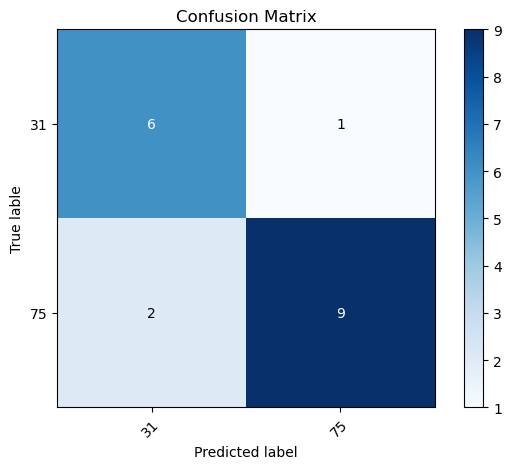

In [92]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred.tolist())

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Customize the plot
ax.figure.colorbar(im, ax=ax)
classes = np.unique(y_test)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True lable',
       xlabel='Predicted label')

# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha='center', va='center',
                color='white' if cm[i, j] > thresh else 'black')

# Display the plot
plt.tight_layout()
plt.show()

In [82]:
print(cm.max())

9
